 **Luisa María Morales Sánchez Cc.1002633805**

# Examen 2: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia

El examen consta de dos partes, cada una con igual valor. Es un examen individual y no se permite el uso de herramientas de inteligencia artificial para su realización. Una lectura detallada será suficiente para resolver ambos problemas, basándose en los conocimientos adquiridos en el curso.


### I. Radiación de Cuerpo Negro:

 La radiación de cuerpo negro, se refiere a la radiación electromagnética emitida por un objeto que absorbe toda la radiación incidente sin reflejar nada. La cual  puede ser modelada según la ley de Planck que relaciona la intensidad de la radiación de un cuerpo negro con la temperatura del objeto. A medida que la temperatura aumenta, la longitud de onda máxima de la radiación se desplaza hacia longitudes de onda más cortas. Para generar una intuición,  piensa en  trozo  de carbón, el cual representa un ejemplo cercano a lo que se conoce como un cuerpo negro en física. Este elemento tiene la particularidad de reflejar mínimamente la luz, capturando prácticamente toda la radiación que recibe. Al alcanzar temperaturas elevadas, similar a las de las brasas ardientes, el carbón comienza a emitir radiación tanto en el rango visible como en el infrarrojo del espectro.

  La radiación de cuerpo negro puede ser modelada empleando la ley de Planck para describir la densidad  espectral  de energía de la radiación emitida por un cuerpo negro a una temperatura (T). La ley de Planck establece que la densidad espectral de energía $u(\lambda, T)$  para un cuerpo negro está dada por:

\begin{equation}
u(\lambda, T) = \frac{{8\pi hc}}{{\lambda^5}} \cdot \frac{1}{{e^{\frac{{hc}}{{\lambda k_B T}}} - 1}}
\end{equation}

 donde:

$h = 6.62607015  \times 10^{-34} \mathrm{J} s$ : es la constante de Planck.

$c = 299792458 \mathrm{m/s}$ : es la velocidad de la luz.


$k_B = 1.380649 \times 10^{-23}\mathrm{J/K}$ : es la constante de Boltzmann.

$ \lambda$ es la longitud de onda.


Podemos integrar la densidad espectral de energía sobre todas las longitudes de onda para obtener la potencia total emitida por unidad de área de un cuerpo negro a una temperatura (T) (ley  de Stefan-Boltzmann):


\begin{equation}
P_{\text{total}} = \sigma T^4
\end{equation}

donde:

$\sigma$ es la constante de Stefan-Boltzmann.


Su tarea en este examen será:

1. Realizar una gráfica de $u(\lambda, T)$ vs $\lambda$, toma valores de $\lambda$ entre $1\mathrm{nm}$ y $8\mathrm{\mu m}$, para valores de
```T=np.array([1000,2000,4000,5000]) ```K


Las curvas resultantes deben reflejar el comportamiento típico de datos experimentales, tal como se muestra al ejecutar el siguiente código :

```python
import requests
from io import StringIO


# URL del archivo txt en línea
url_del_archivo = 'http://www.sc.ehu.es/sbweb/fisica3/calor/radiacion/espectro.txt'

# Realizar una petición GET para obtener el contenido del archivo
respuesta = requests.get(url_del_archivo)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    # Acceder al contenido del archivo
    data_string = respuesta.text
else:
    print(f"Error al acceder al archivo: {respuesta.status_code}")
# Utilizar StringIO para simular un archivo en memoria a partir del string
data = StringIO(data_string)
# Convertir el string a DataFrame, especificando el separador de espacios
df = pd.read_csv(data, sep=" ", header=None)
# Asignar nombres a las columnas si es necesario
df.columns = ['A', 'B', 'C', "D"]
# Mostrar el DataFrame
plt.plot(df.A, df.B)
```



2. Determina la longitud de onda para el cual se obtiene el  máximo valor de cada unas de las anteriores curvas, comprueba que $\lambda_{max} T=2897.8 \mathrm{\mu mK}$



3. De la ley de densidad espectral de energía, mostrar que la potencia total emitida por unidad de área $P_{total}$ es:



\begin{equation}
P_{\text{total}} =  \frac{c}{4}\int_0^{\infty} u(\lambda, T) \mathrm{d}\lambda = \sigma T^4
\end{equation}

donde $\sigma=5.67\times 10^{-8}\mathrm{W m^{-2} K^{-4}}$. Para resolver la integral, se recomienda emplear la sustitución $x=\frac{hc}{\lambda k_BT}$ y emplear algún método computacional de integración conocido :

\begin{equation}
P_{\text{total}} \propto \int_0^{\infty} \frac{x^3}{e^{x}-1} \mathrm{d}x
\end{equation}

muestre que el valor de la integral se aproxima al valor esperado $\frac{\pi^4}{15}$.

Con el resultado anterior, construya una curva de $P_{total}$ vs $T^4$, ¿su resultado esta acorde con los esperado?



In [2]:
#Librerías
import numpy as np
import matplotlib.pylab as plt
import sympy as sp
import scipy as sc
from scipy.optimize import curve_fit
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline

***Punto 1. Densidad espectral de energía.***

In [14]:
#Parámetros
h = 6.62607015E-34 #Js
c = 299792458 #m/s
k_B = 1.380649E-23 #J/K

#Longitud de onda
Lambda = np.linspace(1E-9,8E-6,200)

#Temperatura en Kelvin
T1 = 1000
T2 = 2000
T3 = 4000
T4 = 5000

#Función
def density(Lambda,T):
  exp = ((h*c)/(Lambda*k_B*T))
  a = (8*np.pi*h*c)/(Lambda**5)
  b = 1/(np.exp(exp) -1)
  return a*b


U1 = density(Lambda,T1)
U2 = density(Lambda,T2)
U3 = density(Lambda,T3)
U4 = density(Lambda,T4)

<ipython-input-14-410d01e7a22d>:19: RuntimeWarning: overflow encountered in exp
  b = 1/(np.exp(exp) -1)


6.62607015e-34

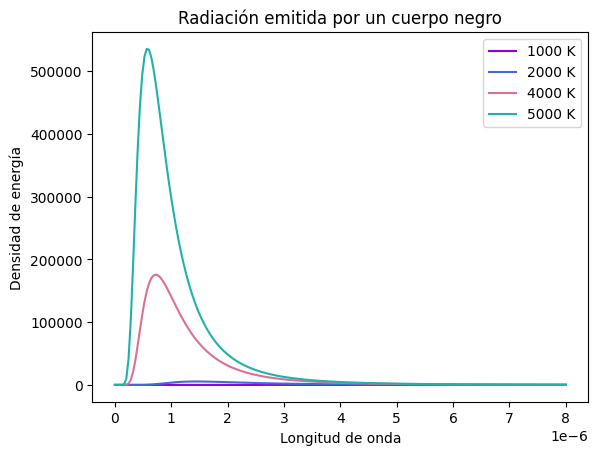

In [4]:
#Gráfica u(λ,T) vs λ
plt.figure()
plt.title('Radiación emitida por un cuerpo negro')
plt.plot(Lambda,U1,color='darkviolet',label = '1000 K')
plt.plot(Lambda,U2,color='royalblue',label = '2000 K')
plt.plot(Lambda,U3,color='palevioletred',label = '4000 K')
plt.plot(Lambda,U4,color='lightseagreen',label = '5000 K')
plt.xlabel('Longitud de onda')
plt.ylabel('Densidad de energía')
plt.legend()
plt.show()

***Punto 2. Longitud de onda máxima***

In [5]:
#Máximos de la función para cada temperatura
max1 = np.argmax(U1)
max2 = np.argmax(U2)
max3 = np.argmax(U4)
max4 = np.argmax(U3)

#Longitud de onda máxima
Lmax1 = Lambda[max1]
Lmax2 = Lambda[max2]
Lmax3 = Lambda[max3]
Lmax4 = Lambda[max4]
print(f'Las Longitudes de onda máximas para cada curva son: {Lmax1},{Lmax2},{Lmax3},{Lmax4}')

Las Longitudes de onda máximas para cada curva son: 2.895110552763819e-06,1.4480552763819095e-06,5.637437185929647e-07,7.245276381909547e-07


***Punto 3. Potencia total emitida.***

In [6]:
from sympy import pi, oo, tan, symbols, integrate

In [7]:
T=np.array([1000,2000,4000,5000])

x = np.zeros(len(Lambda))
for i in range(len(T)):
  x = (h*c)/(Lambda*k_B*T[i])

#Función de potencia total por unidad de área
def P_t(x):
  P = (x**3)/(np.exp(x) -1)
  return P

Ptotal = sc.integrate.quad(P_t,0,np.inf)[0]
print(f'La potencia total emitida es: {Ptotal}')

La potencia total emitida es: 6.49393940226683


<ipython-input-7-8ee3995b3636>:9: RuntimeWarning: overflow encountered in exp
  P = (x**3)/(np.exp(x) -1)


El valor de la integral se aproxima a $\frac{\pi^4}{15}$ = 6.49393...

\begin{equation}
P_{total} = \frac{{\pi⁴}}{{15}} \cdot T⁴\frac{2\pi k_{B}⁴}{{h³ c²}}
\end{equation}


In [18]:
for i in range(len(T)):
  P_ = Ptotal*(T**4)*((2*np.pi*(k_B**4))/((h**3)*c**2))
P_

array([   56703.74419184,   907259.90706951, 14516158.51311215,
       35439840.1199027 ])

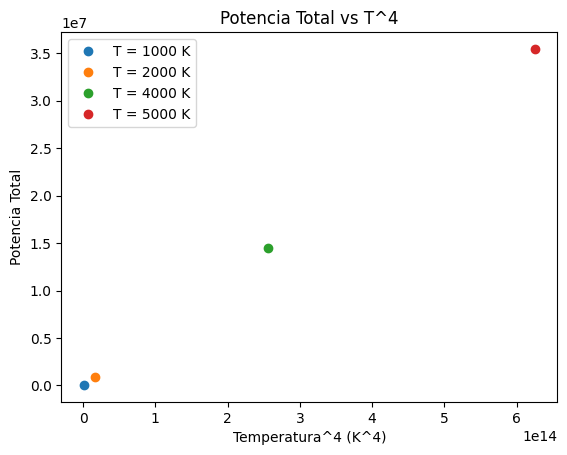

In [24]:
#Gráfica P_total  vs T^4
for i in range(len(T)):
 plt.plot(T[i]**4,P_[i],'o',label=f'T = {T[i]} K')
 plt.xlabel('Temperatura^4 (K^4)')
 plt.ylabel('Potencia Total')
 plt.title('Potencia Total vs T^4')
 plt.legend()

El resultado que se obtiene en esta gráfica nos indica que para la Potencia total emitida por unidad de area es la proporcional a la  cuarta potencia de la temperatura dada, entre más temperatura el cuerpo negro tiene más potencia.

# 2. Calentamiento Global
El conjunto de datos a continuación ofrece una visión detallada de las anomalías de temperatura terrestre:


https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt


Las anomalías de temperatura son variaciones en la temperatura media superficial del planeta respecto a un promedio histórico. Estas variaciones pueden ser tanto positivas (más cálidas) como negativas (más frías) y constituyen indicadores esenciales del cambio climático a nivel mundial. Para obtener información adicional, consulte:


https://climate.nasa.gov/en-espanol/signos-vitales/temperatura-global/?intent=111

Este ejercicio no solo busca profundizar en la comprensión del calentamiento global, sino también distinguir entre la interpolación y la construcción de modelos. Con el código proporcionado que procesa los datos de cambio climático reportados por la National Aeronautics and Space Administration,


```python
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())
```

Realice lo siguiente en un gráfico combinado:



1. Gráfico de la media móvil de 5 años (Promedio_5) frente al año, representado con líneas.
2. Gráfico de los datos sin suavizar (NoSauvizado) frente al año.


3. Analice el gráfico resultante y extraiga conclusiones.

Posteriormente, construiremos un modelo para evaluar el incremento de la temperatura en años recientes utilizando el código de regresión dado a continuación:


```python
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

```


 Seleccione los datos del periodo 2000-2020 y proceda a:

4. Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.
5. Interpolar los datos entre los años 2000 y 2020.


6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.






***Gráfica de la Temperatura terrestre con el paso de los años***

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSuavizado",  "Promedio_5"]

no_sua = data['NoSuavizado']
p_5 = data['Promedio_5']
year = data['Año']
data

,Año,NoSuavizado,Promedio_5
0,1880,-0.17,-0.09
1,1881,-0.09,-0.13
2,1882,-0.11,-0.17
3,1883,-0.17,-0.21
4,1884,-0.29,-0.24
...,...,...,...
139,2019,0.98,0.94
140,2020,1.02,0.95
141,2021,0.85,0.98
142,2022,0.90,1.00


Text(0.5, 0.98, 'Temperatura terrestre')

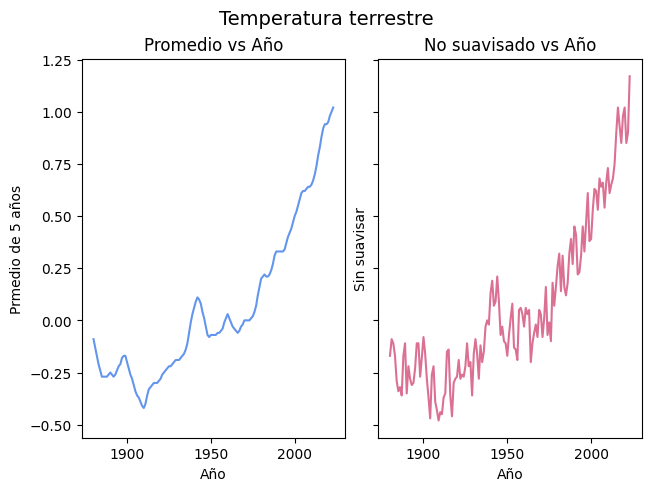

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)
ax1.plot(year,p_5,color='cornflowerblue')
ax1.set_title('Promedio vs Año')
ax1.set_xlabel('Año')
ax1.set_ylabel('Prmedio de 5 años')

ax2.plot(year,no_sua,color='palevioletred')
ax2.set_xlabel('Año')
ax2.set_ylabel('Sin suavisar')
ax2.set_title('No suavisado vs Año')

fig.suptitle('Temperatura terrestre', fontsize=14)

***Analisis***

Del gráfico podemos analizar la cantidad de incrementos y descensos de temperatura en el planeta por más de un siglo. Teniendo en cuenta los datos que arroja la pagina de la Nasa, se nota un gran incremento de temperatura desde el año 2000, ya que de una temperatura que aumentaba aproximadamente 0.15° y bajaba 0.5°, aumentó exponencialmente sin caidas hasta llegar a un valor de casi 1° en los 2020s. Además se puede notar la cantidad de daño que ha sufrido la superficie terrestre para elevaciones de temperaturas tan grandes con pocas posibilidades de un equilibrio.


***Punto 4. Ajuste Lineal de datos sin suavisar vs año***

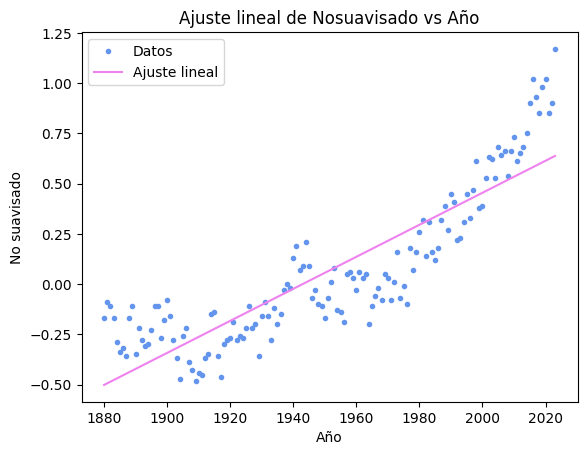

In [ ]:
# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(u, m, b):
    return m * u + b

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, year, no_sua)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(year), max(year), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.title('Ajuste lineal de Nosuavisado vs Año')
plt.plot(year, no_sua,".",color='cornflowerblue',label='Datos')
plt.plot(x_fit, y_fit, color='violet',label='Ajuste lineal')
plt.xlabel('Año')
plt.ylabel('No suavisado')
plt.legend()
plt.show()

***Punto 5. Interpolacion de los datos del 2000 hasta el 2020***

In [ ]:
new = data.drop(data.index[[141,142,143]])
new_data = new.drop(new.index[:120])
YEAR = new_data['Año']
P_5 = new_data['Promedio_5']
NO = new_data['NoSauvizado']
new_data

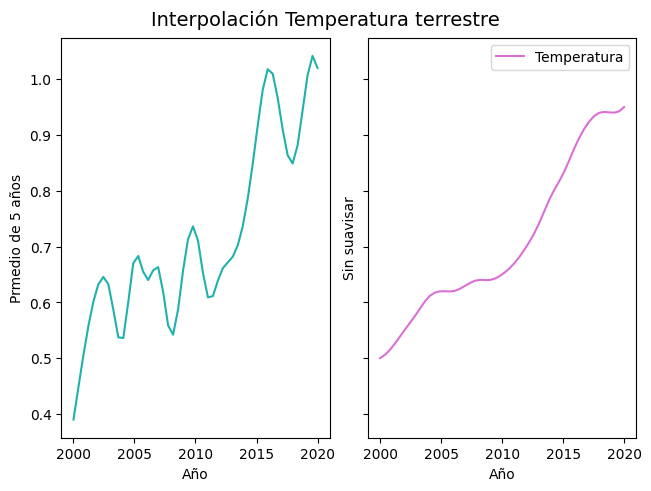

In [ ]:
Y = np.linspace(np.min(YEAR),np.max(YEAR))
inter = CubicSpline(YEAR,P_5)
inter2 = CubicSpline(YEAR,NO)

#Gráfica de datos interpolados
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)
ax1.plot(Y,inter2(Y),color='lightseagreen',label='Temperatura')
ax1.set_xlabel('Año')
ax1.set_ylabel('Prmedio de 5 años')
ax2.plot(Y,inter(Y),color='orchid',label='Temperatura')
ax2.set_xlabel('Año')
ax2.set_ylabel('Sin suavisar')
fig.suptitle('Interpolación Temperatura terrestre', fontsize=14)
plt.legend()
plt.show()

***Punto 6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.***

Es preferible realizar una ajuste lineal de los datos en este caso, dado que se puede observar como ha incrementado la temperatura tesrrestre a lo largo de tantos años, para analizar su comportamiento ascendente. Como ya tenemos el modelo de los datos, la interpolación se encarga de mostrar nuevamente la grafica original con los datos mas suavisados, lo que no nos interesa dado que lo que necesitamos ver es su crecimiento.

***Punto 7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.***

A pesar de que es una tarea dificil, por factopres que hacen que la temperatura incremente, como el consumo desmedido, asunto que se trata de controlar pero se sale de las manos. Se puede hacer un analisis de cuanto es el incremento de temperatura por año al igual que sus descensos, a su vez que se puede estudiar la cantidad de radiación solar que llega al planeta y como lo afecta en el momento. Tambien se pude tener un registro meteorologico sobre lo que ha pasado años anteriores y su impacto. Gracias a las graficas que registran el aumento de temperatura se puede identificar un patrón. Una predicción de este calibre requiere enfoques cientificos muy rigurosos y un avance en la tecnologia que facilite el estudio,sin embargo por el momento sigue siendo una tarea muy complicada por los factores impredecibles que atestiguamos.